In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
np.random.seed(0)

In [3]:
#Importando dados
teste_data = pd.read_csv("/kaggle/input/titanic/test.csv")
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")

train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## *Analise Inicial do Dataset*

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
teste_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Categorical Features: Sex, Survived, PClass, Embarked
* Numerical Features: Age (Continua), Fare (Continua), SibSp (Discreta), Parch (Discreta)
* Alphanumeric: Cabin, Ticket


## *Tratamento dos dados Nulos*

In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_features = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']
teste_features = ['Age', 'Fare', 'SibSp', 'Parch']
#Criando dataframes com apenas numerical features
train = train_data[train_features]
teste = teste_data[teste_features] 


In [9]:
train.dropna() # Removendo todas as variaveis NaN

,Age,Fare,SibSp,Parch,Survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0
...,...,...,...,...,...
885,39.0,29.1250,0,5,0
886,27.0,13.0000,0,0,0
887,19.0,30.0000,0,0,1
889,26.0,30.0000,0,0,1


In [10]:
teste.fillna(0) # Substituindo variaveis NaN por 0

,Age,Fare,SibSp,Parch
0,34.5,7.8292,0,0
1,47.0,7.0000,1,0
2,62.0,9.6875,0,0
3,27.0,8.6625,0,0
4,22.0,12.2875,1,1
...,...,...,...,...
413,0.0,8.0500,0,0
414,39.0,108.9000,0,0
415,38.5,7.2500,0,0
416,0.0,8.0500,0,0


## *Exploração banco de dados*

<Axes: title={'center': 'Sobrevivencia por Grupo de Idade'}, xlabel='AgeGroup', ylabel='Survived'>

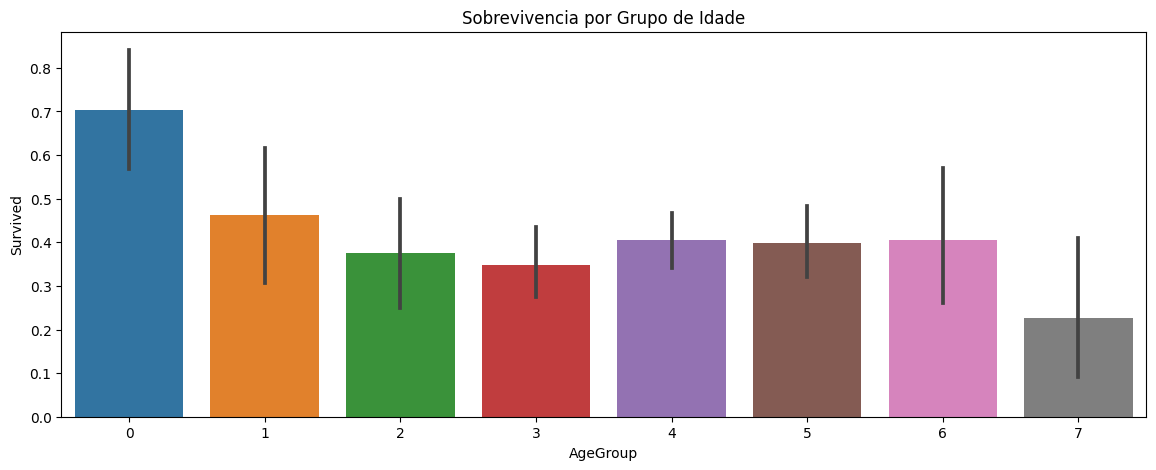

In [11]:
bins = [0, 5, 15, 18, 24, 35, 50, 60, np.inf]

labels = [0, 1, 2, 3, 4, 5, 6, 7]
#labels = ['Bebe', 'Criança', 'Adolescente', 'Universitario', 'Jovem Adulto', 'Adulto', 'Senhor', 'Idoso']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
teste['AgeGroup'] = pd.cut(teste["Age"], bins, labels = labels)
plt.figure(figsize=(14,5))
plt.title('Sobrevivencia por Grupo de Idade')
sns.barplot(x="AgeGroup", y="Survived", data=train)

#train['AgeGroup'] = {'Bebe':0, 'Criança':1, 'Adolescente':2, 'Universitario':3, 'Jovem Adulto':4, 'Adulto':5, 'Senhor':6, 'Idoso':7}

<Axes: xlabel='Parch', ylabel='Survived'>

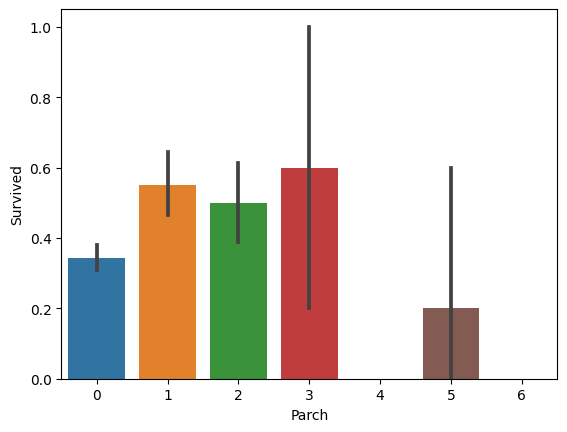

In [12]:
sns.barplot(x="Parch", y="Survived", data=train)

<Axes: xlabel='SibSp', ylabel='Survived'>

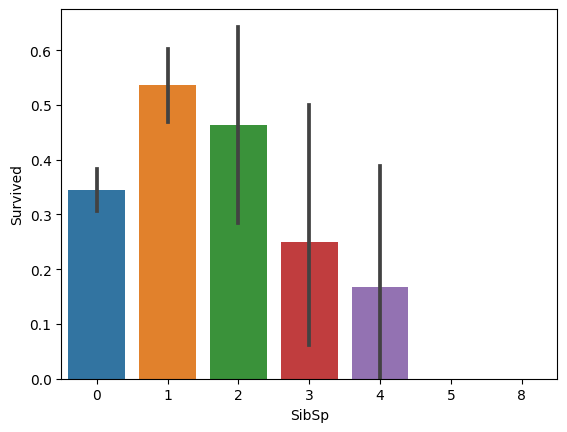

In [13]:
sns.barplot(x="SibSp", y="Survived", data=train)

## *Treinando o modelo*

In [14]:
from sklearn.model_selection import train_test_split

X = train.drop(['Survived'], axis=1)
X = X.dropna()
Y = train['Survived']
Y = Y.loc[X.index]

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)


RandomForestClassifier()

In [16]:
y_pred = randomforest.predict(x_val)
accuracy_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(accuracy_randomforest)

65.03


## *Utilizando todo o banco de dados*

In [17]:
from sklearn.model_selection import train_test_split

X = train_data.drop(['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
X = X.dropna()
Y = train_data['Survived']
Y = Y.loc[X.index]
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.20, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)

y_pred = randomforest.predict(x_val)
accuracy_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(accuracy_randomforest)

74.13


In [18]:
X_teste = teste_data.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
X_teste = X_teste.dropna()
teste_ids = teste_data["PassengerId"]
teste_ids = teste_ids.loc[X_teste.index]
predictions = randomforest.predict(X_teste)
submission = pd.DataFrame({"PassengerId": teste_ids, "Survived": predictions})
submission.to_csv("submission.csv", index=False)